Importing dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

importing libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Data Preprocessing

Traing image preprocessing


In [ ]:
training_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition/train',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False

)

Found 3115 files belonging to 36 classes.


In [ ]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition/validation',
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False

)

Found 351 files belonging to 36 classes.


building model

In [ ]:
cnn=tf.keras.models.Sequential()

building convutional layer  

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

compiling and training phase

In [ ]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=120)

NameError: name 'cnn' is not defined

saving model

In [ ]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


recording history

In [ ]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
training_history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Calculating accuracy of model achieved on validation set

In [ ]:
print("Validation set Accuracy:{} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy:13.105413317680359 %


Visualization of accuracy

In [ ]:
epochs=[i for i in range(1,121)]
epochs

[1, 2, 3]

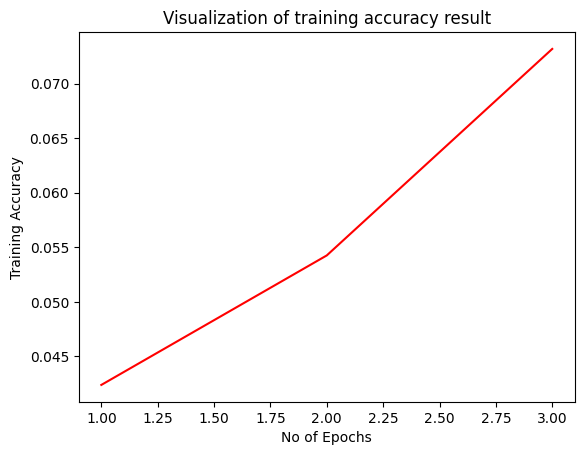

In [ ]:
#visualization of training_accuracy
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of training accuracy result')
plt.show()

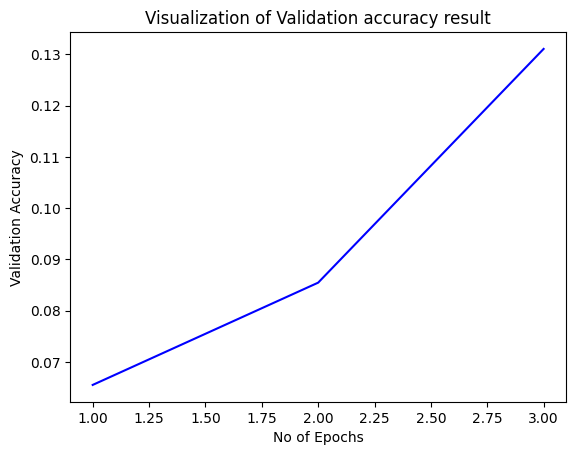

In [ ]:
#visualization of validation_accuracy
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation accuracy result')
plt.show()